In [1]:
#import librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow  as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

from tensorflow.keras.callbacks import *

from sklearn.metrics import mean_absolute_error
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

import os

In [2]:
#see if gpu is avaible
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
#get data and filtere it 
frame = pd.read_csv(r'weekcount.csv')
df = pd.DataFrame(frame)
df.drop(df[df['year'] == 2020].index, inplace = True) #'REMOVE2020'
#df.drop(df[df['year'] == 2015].index, inplace = True) #remove 2015
#df.drop(df[df['year'] == 2019].index, inplace = True) #'REMOVE2020'
test = pd.DataFrame(df)

#reading and dumming datta
col = list(df.columns.values)

 
df.head()

year  week                station  anzahl
0  2015    39      5 Corners Library      43
1  2015    39  Baldwin at Montgomery      66
2  2015    39           Bayside Park      16
3  2015    39           Brunswick St     186
4  2015    39            Central Ave      25

In [4]:
#get input and output
x = df.drop("anzahl",axis=1)
y = df["anzahl"]


In [5]:
#split data into train and test
x_train, x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,shuffle=False)


In [6]:
#normalisie data
ct = make_column_transformer(
 (MinMaxScaler(),["year","week"]),
     (OneHotEncoder(handle_unknown="ignore"),["station"])
 )

ct.fit(x_train)

x_train_normalized = ct.transform(x_train)

x_test_normalized = ct.transform(x_test)

x_train_normalized.shape

(8375, 65)

In [7]:
print(x_test_normalized.toarray())

[[1.         0.19230769 0.         ... 0.         0.         0.        ]
 [1.         0.19230769 0.         ... 0.         0.         0.        ]
 [1.         0.19230769 0.         ... 0.         0.         0.        ]
 ...
 [1.         0.98076923 0.         ... 0.         0.         0.        ]
 [1.         0.98076923 0.         ... 1.         0.         0.        ]
 [1.         0.98076923 0.         ... 0.         0.         1.        ]]


In [8]:
#load saved model if avaiable 
#with tf.device('/device:GPU:0'):
#    model = keras.models.load_model('Model1')

In [2]:
#create Model structure
with tf.device('/device:CPU:0'):
    model = Sequential()
    model.add(Dense(65, kernel_initializer='normal',  activation='relu', input_shape=(65,) ))    
    model.add(Dense(35, kernel_initializer='normal',activation='relu'))   
    model.add(Dense(35, kernel_initializer='normal',activation='relu'))   
    model.add(Dense(1, kernel_initializer='normal',activation=None))


In [3]:
#set model loss and optimizer
with tf.device('/device:CPU:0'):
    model.compile(optimizer= Adam(learning_rate=0.001),loss='mae', metrics=['mae','mape'])

In [11]:
#checkpoint to save best Model which isnt overfitted
checkpoint = ModelCheckpoint('Model1', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='min' )

In [25]:
#train Model
with tf.device('/device:CPU:0'):
    history = model.fit(x_train_normalized, y_train.values, epochs=350 , batch_size=100,shuffle=False ,verbose = 1   ) #,callbacks=[checkpoint]

Epoch 1/350
84/84 [==============================] - 0s 1ms/step - loss: 41.5990 - mae: 41.5990 - mape: 58.6051
Epoch 2/350
84/84 [==============================] - 0s 1ms/step - loss: 41.5571 - mae: 41.5571 - mape: 58.5714
Epoch 3/350
84/84 [==============================] - 0s 1ms/step - loss: 41.5121 - mae: 41.5121 - mape: 58.5087
Epoch 4/350
84/84 [==============================] - 0s 1ms/step - loss: 41.4349 - mae: 41.4348 - mape: 58.2364
Epoch 5/350
84/84 [==============================] - 0s 1ms/step - loss: 41.3738 - mae: 41.3738 - mape: 58.1882
Epoch 6/350
84/84 [==============================] - 0s 1ms/step - loss: 41.3215 - mae: 41.3215 - mape: 58.0371
Epoch 7/350
84/84 [==============================] - 0s 1ms/step - loss: 41.2727 - mae: 41.2727 - mape: 57.8663
Epoch 8/350
84/84 [==============================] - 0s 1ms/step - loss: 41.2281 - mae: 41.2281 - mape: 57.8191
Epoch 9/350
84/84 [==============================] - 0s 1ms/step - loss: 41.1598 - mae: 41.1598 - mape: 

84/84 [==============================] - 0s 1ms/step - loss: 25.3926 - mae: 25.3926 - mape: 37.3840
Epoch 145/350
84/84 [==============================] - 0s 1ms/step - loss: 25.2758 - mae: 25.2758 - mape: 37.3747
Epoch 146/350
84/84 [==============================] - 0s 1ms/step - loss: 25.0912 - mae: 25.0912 - mape: 37.2677
Epoch 147/350
84/84 [==============================] - 0s 1ms/step - loss: 24.9992 - mae: 24.9992 - mape: 37.1878
Epoch 148/350
84/84 [==============================] - 0s 1ms/step - loss: 24.8706 - mae: 24.8706 - mape: 37.2011
Epoch 149/350
84/84 [==============================] - 0s 1ms/step - loss: 24.7325 - mae: 24.7325 - mape: 37.0793
Epoch 150/350
84/84 [==============================] - 0s 1ms/step - loss: 24.6018 - mae: 24.6018 - mape: 37.0816
Epoch 151/350
84/84 [==============================] - 0s 1ms/step - loss: 24.5341 - mae: 24.5341 - mape: 37.0118
Epoch 152/350
84/84 [==============================] - 0s 1ms/step - loss: 24.4168 - mae: 24.4168 - ma

Epoch 216/350
84/84 [==============================] - 0s 1ms/step - loss: 20.0584 - mae: 20.0584 - mape: 32.8221
Epoch 217/350
84/84 [==============================] - 0s 1ms/step - loss: 20.0731 - mae: 20.0731 - mape: 32.9397
Epoch 218/350
84/84 [==============================] - 0s 1ms/step - loss: 20.0418 - mae: 20.0418 - mape: 32.8697
Epoch 219/350
84/84 [==============================] - 0s 1ms/step - loss: 19.9447 - mae: 19.9447 - mape: 32.6599
Epoch 220/350
84/84 [==============================] - 0s 1ms/step - loss: 20.1104 - mae: 20.1104 - mape: 32.9183
Epoch 221/350
84/84 [==============================] - 0s 1ms/step - loss: 19.8709 - mae: 19.8709 - mape: 32.9386
Epoch 222/350
84/84 [==============================] - 0s 1ms/step - loss: 19.8398 - mae: 19.8398 - mape: 32.7910
Epoch 223/350
84/84 [==============================] - 0s 1ms/step - loss: 19.8506 - mae: 19.8506 - mape: 32.6150
Epoch 224/350
84/84 [==============================] - 0s 1ms/step - loss: 19.6200 - mae

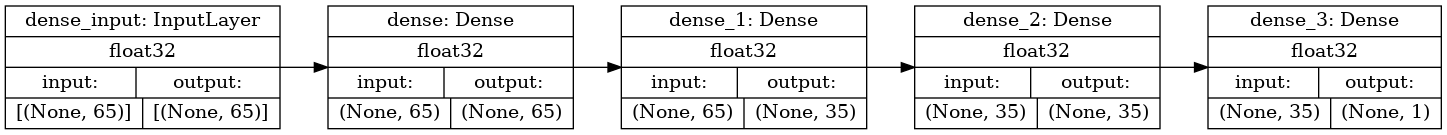

In [15]:
tf.keras.utils.plot_model(model, to_file="model1.png",
    show_shapes=True,
    show_dtype=True,
   
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96)

UsageError: Line magic function `%tensorboard` not found.


In [26]:
model.evaluate(x_test_normalized,y_test.values)

66/66 [==============================] - 1s 11ms/step - loss: 33.6014 - mae: 33.6014 - mape: 28.0099


[33.601356506347656, 33.601356506347656, 28.00989532470703]

In [15]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 50])
    plt.xlabel('Epoch')
    plt.ylabel('Error [Anzahl]')
    plt.legend()
    plt.grid(True)

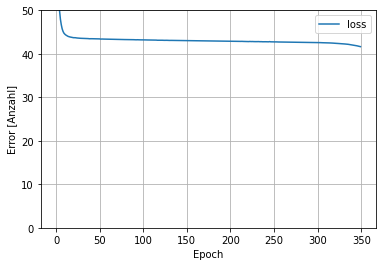

In [24]:
with tf.device('/device:CPU:0'):
    plot_loss(history)

In [17]:
stationnamesframe =   test.drop_duplicates() 
stationnamesframe = pd.DataFrame(stationnamesframe,columns=['station'])
stationnamesframe =   stationnamesframe.drop_duplicates() 
stationnames =  pd.DataFrame(stationnamesframe , columns=['station'])['station'].to_numpy().tolist()
print(stationnames)

['5 Corners Library', 'Baldwin at Montgomery', 'Bayside Park', 'Brunswick St', 'Central Ave', 'Christ Hospital', 'City Hall', 'Columbia Park', 'Dey St', 'Essex Light Rail', 'Exchange Place', 'Garfield Ave Station', 'Grove St PATH', 'Hamilton Park', 'Heights Elevator', 'Hilltop', 'JC Medical Center', 'Liberty Light Rail', 'Lincoln Park', 'MLK Light Rail', 'McGinley Square', 'NJCU', 'Newark Ave', 'Newport PATH', 'Newport Pkwy', 'North St', 'Oakland Ave', 'Paulus Hook', 'Pershing Field', 'Riverview Park', 'Sip Ave', 'Union St', 'Van Vorst Park', 'Warren St', 'West Side Light Rail', 'Jersey & 3rd', 'Jersey & 6th St', 'Lafayette Park', 'Morris Canal', 'Bethune Center', 'Columbus Drive', 'Danforth Light Rail', 'Dixon Mills', 'Leonard Gordon Park', 'Manila & 1st', 'Marin Light Rail', 'Monmouth and 6th', 'Astor Place', 'Brunswick & 6th', 'JCBS Depot', 'Communipaw & Berry Lane', 'York St', 'Harborside', 'Journal Square', 'Washington St', 'Bergen Ave', 'Fairmount Ave', 'Glenwood Ave', 'Grand St'

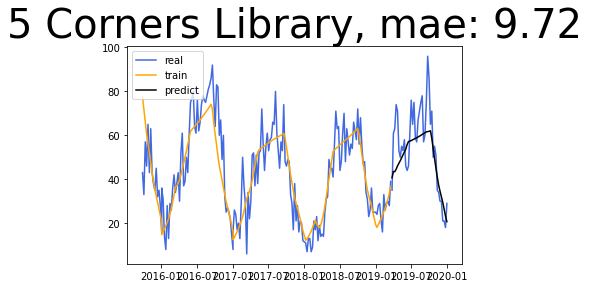

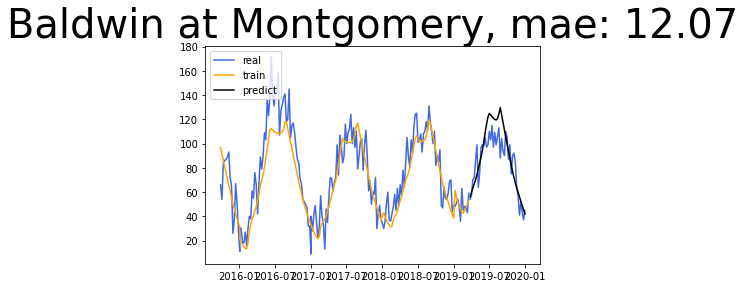

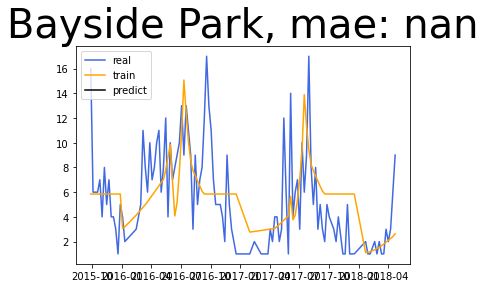

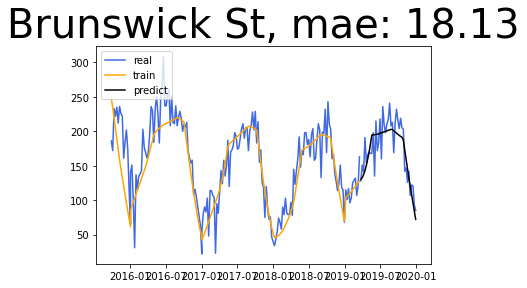

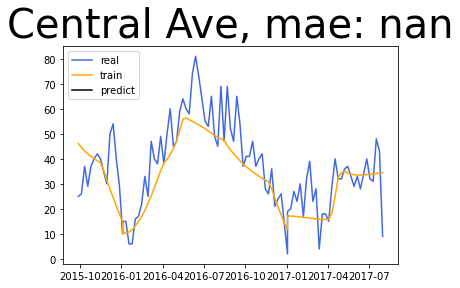

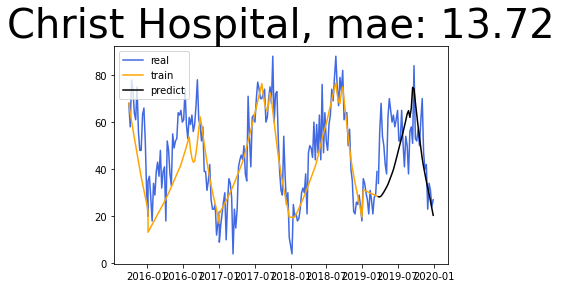

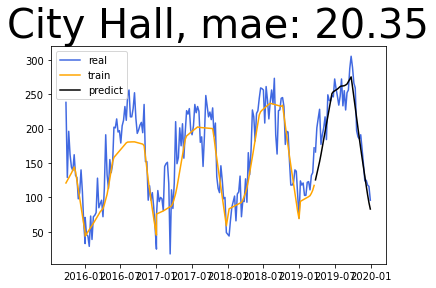

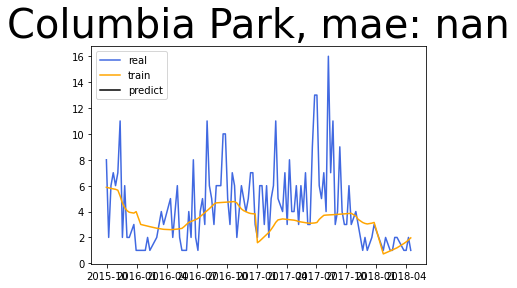

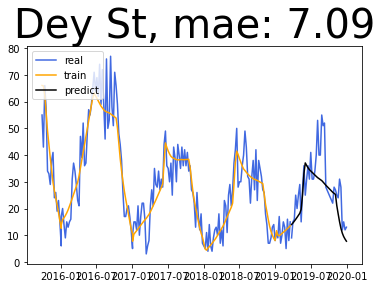

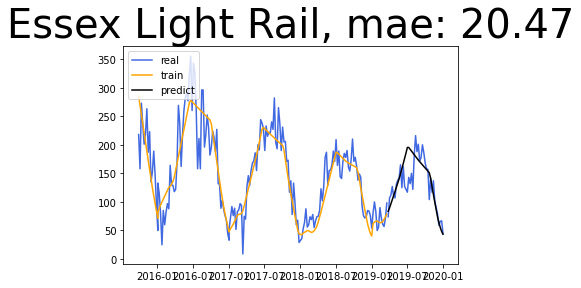

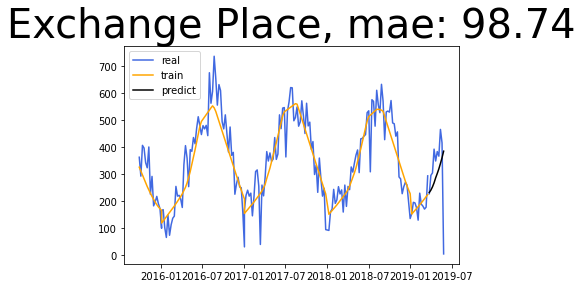

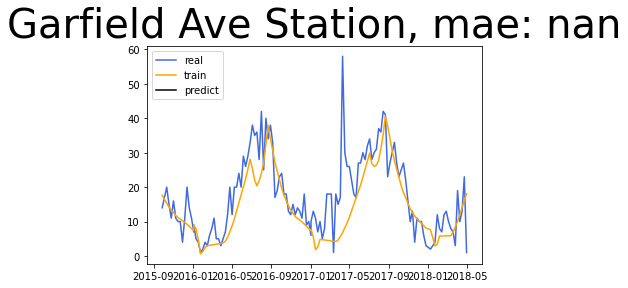

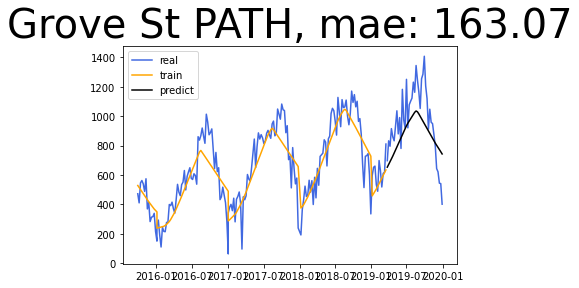

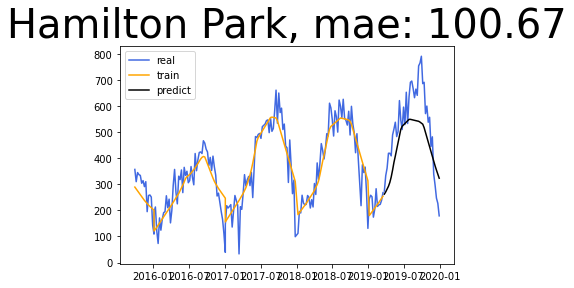

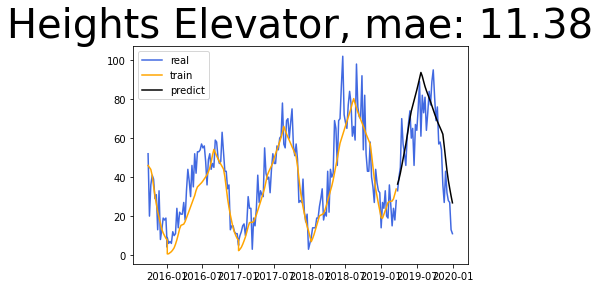

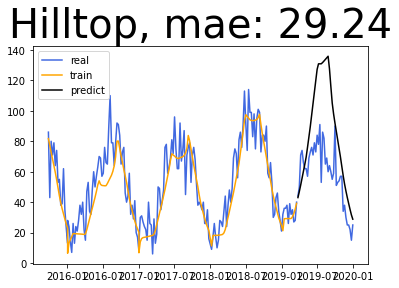

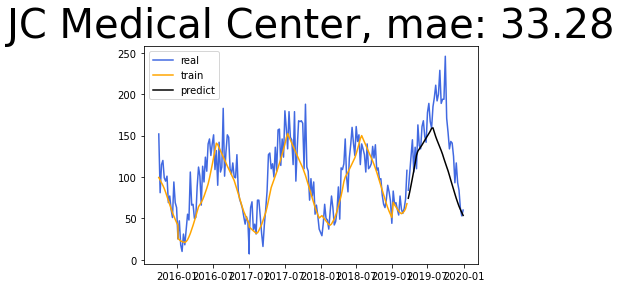

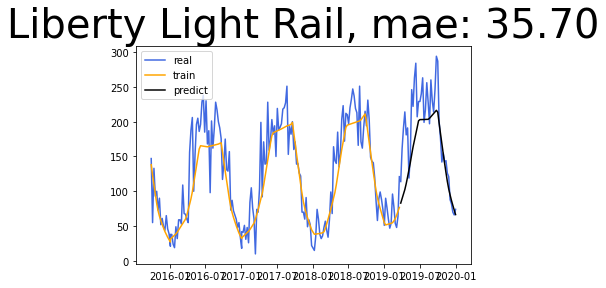

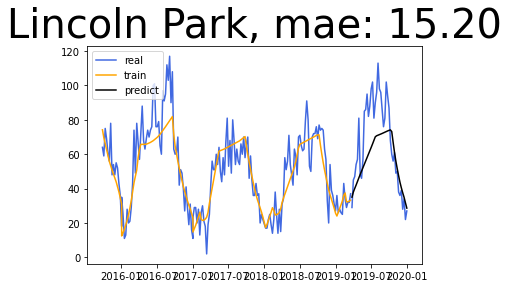

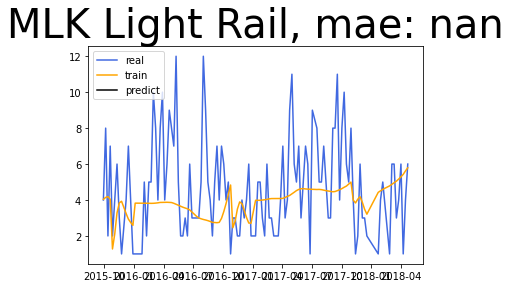

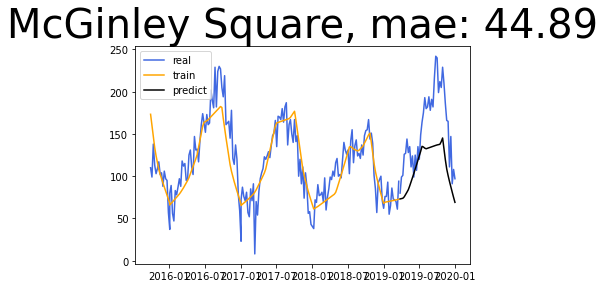

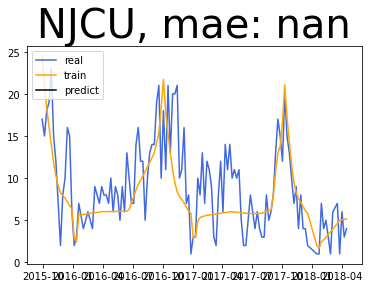

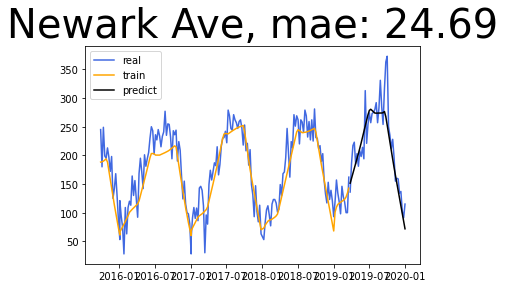

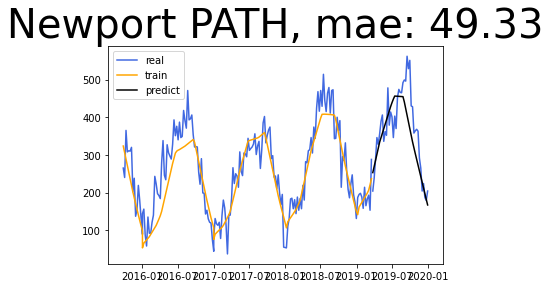

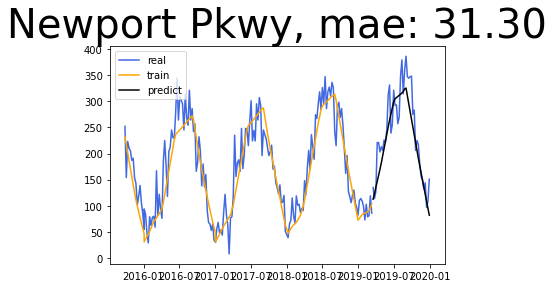

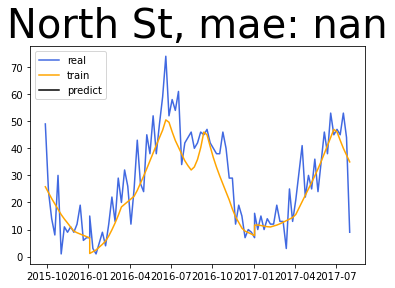

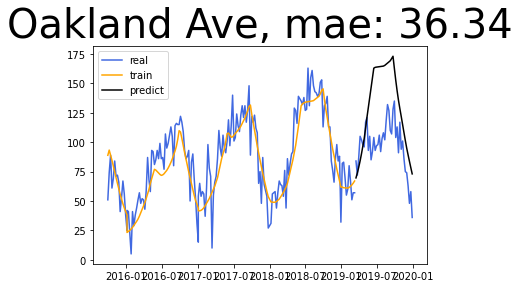

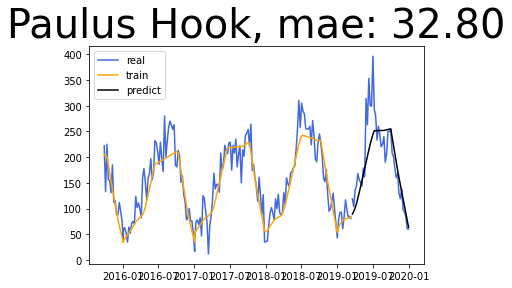

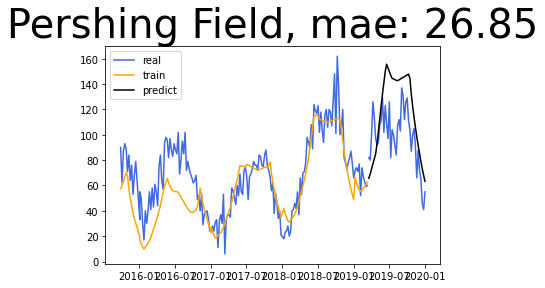

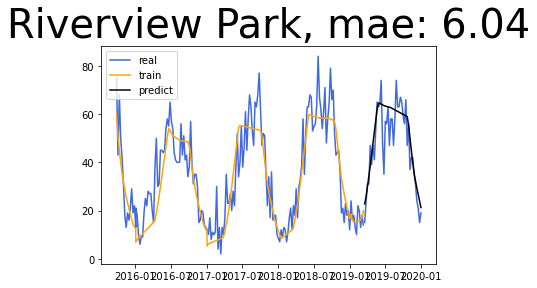

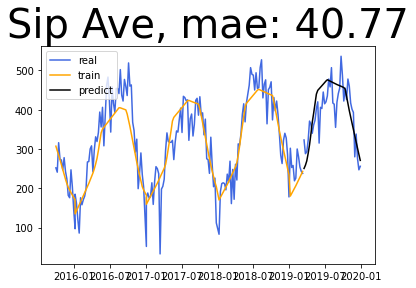

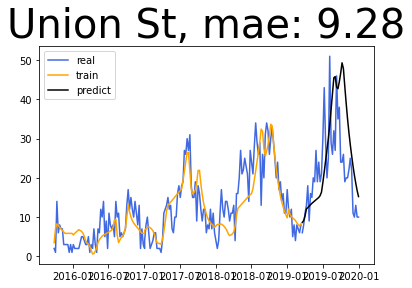

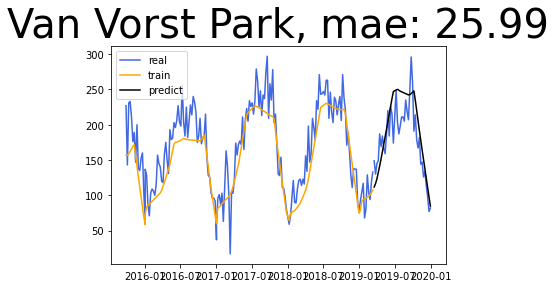

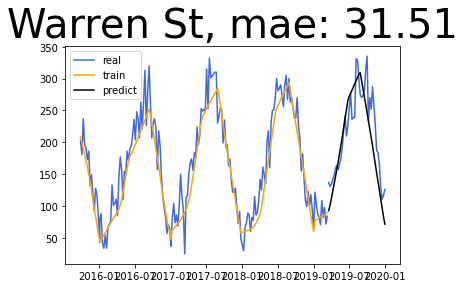

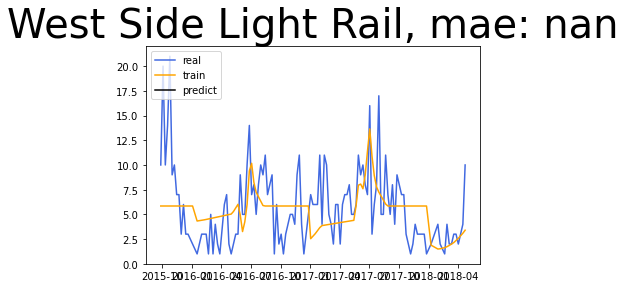

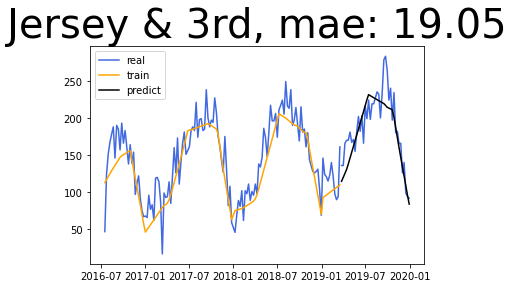

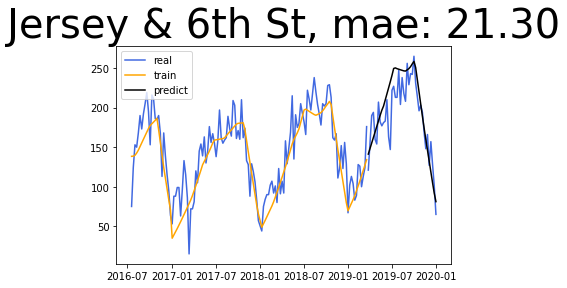

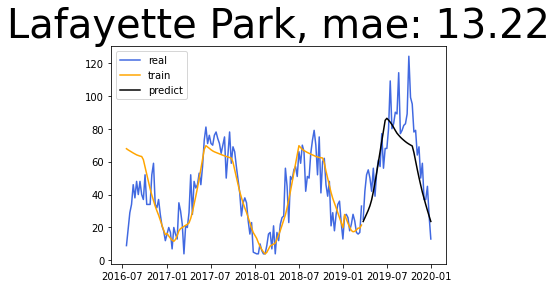

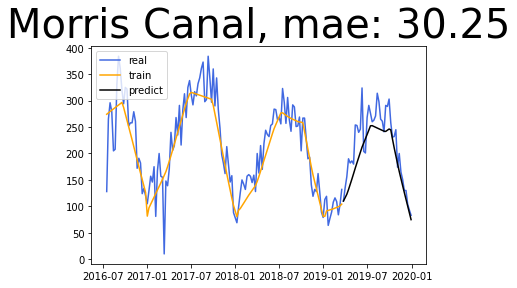

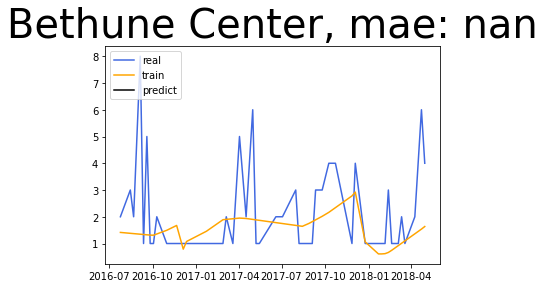

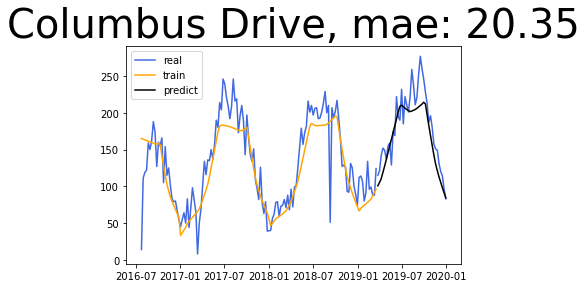

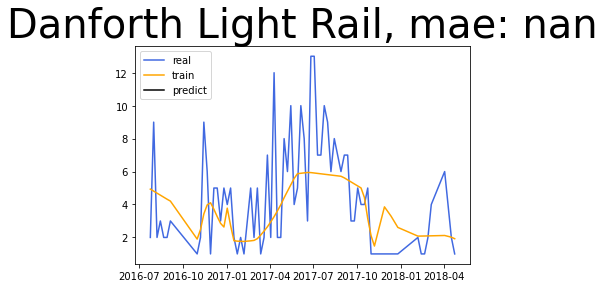

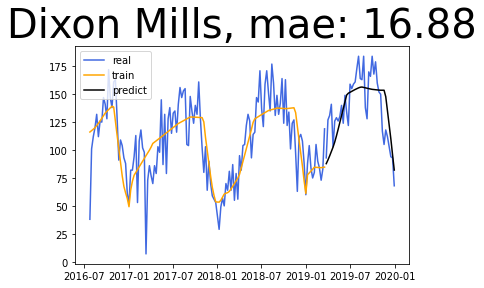

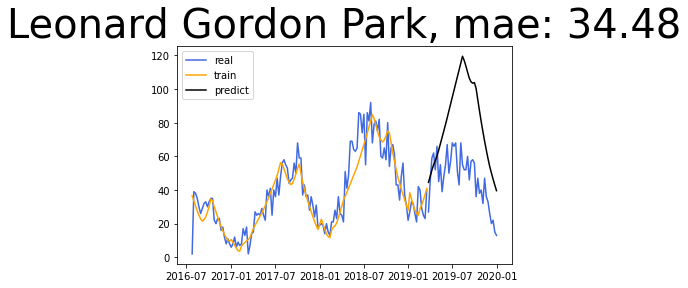

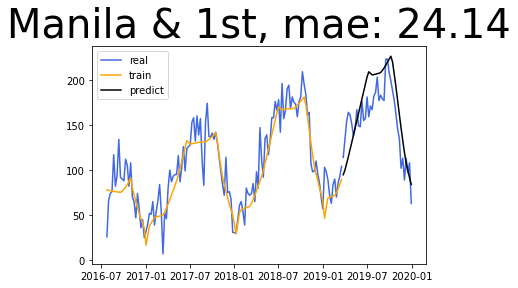

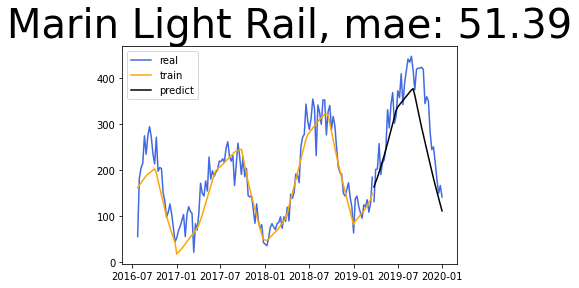

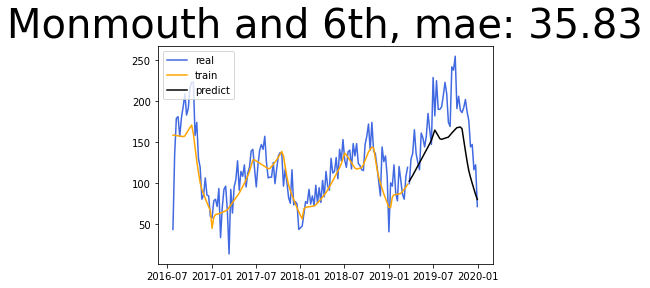

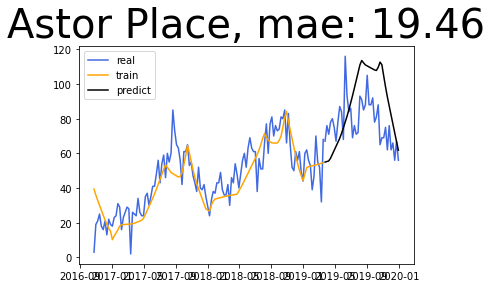

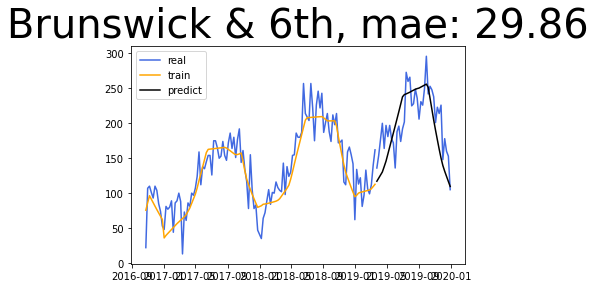

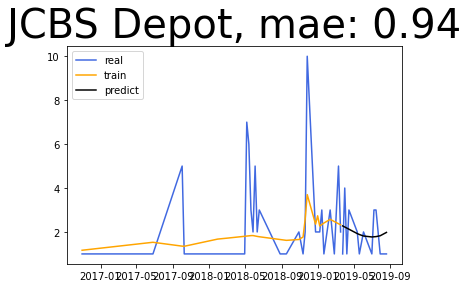

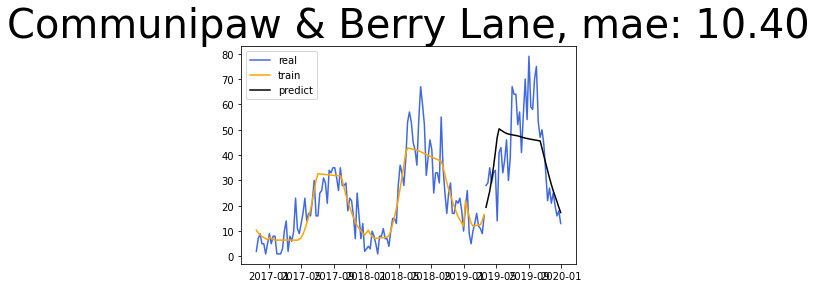

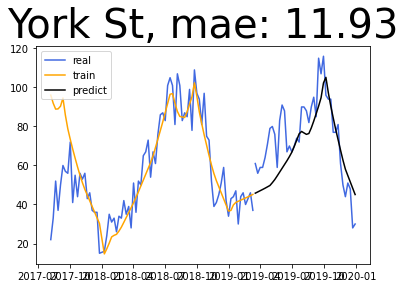

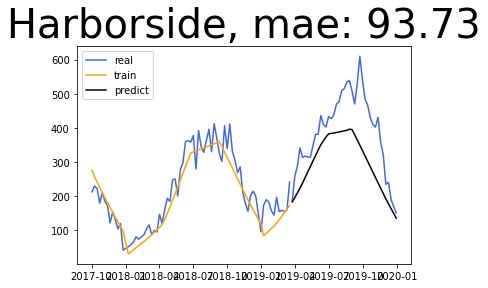

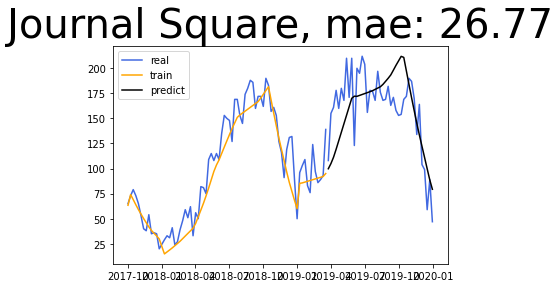

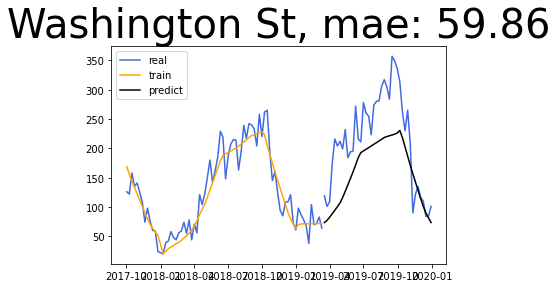

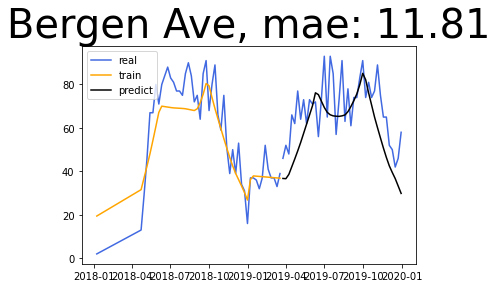

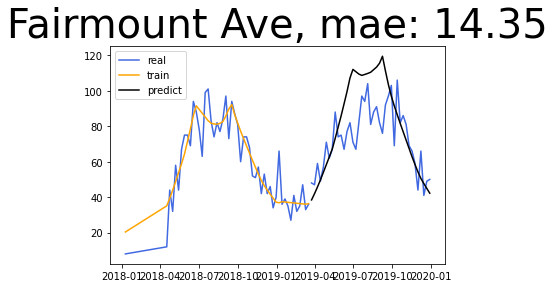

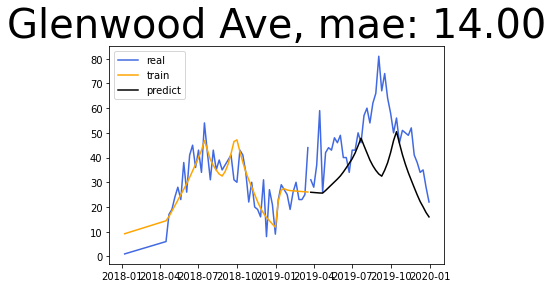

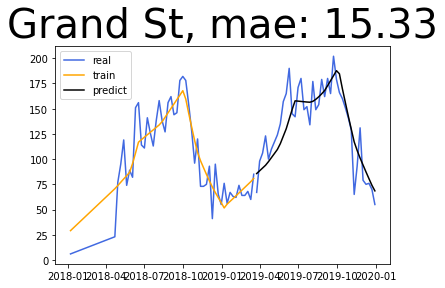

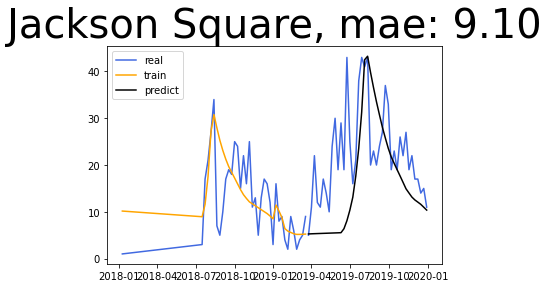

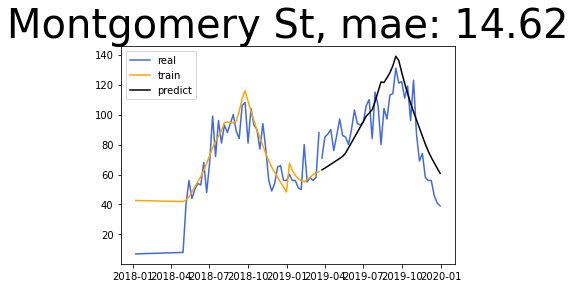

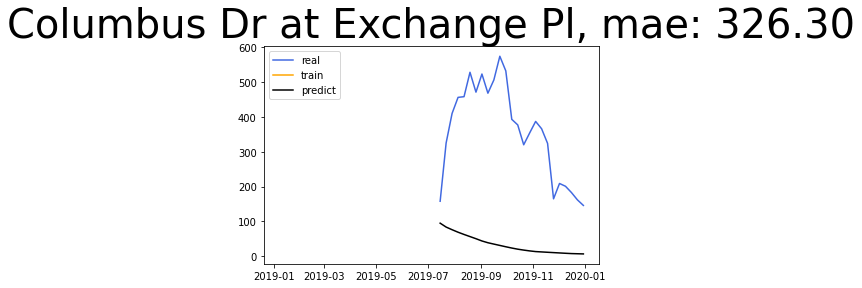

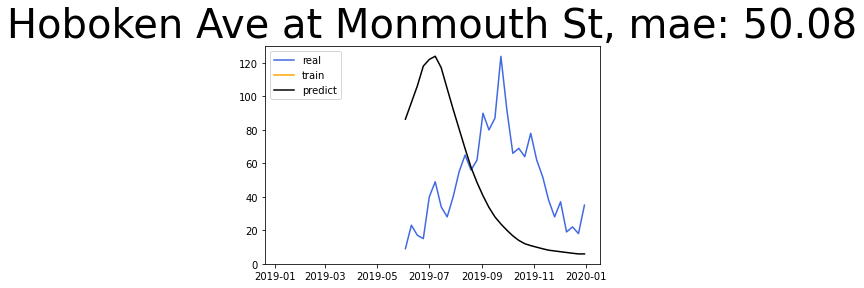

In [29]:
#show result data linear

for station in stationnames:
    predict_train = model.predict(x_train_normalized)
    y1 =  y_train 
    y2 =  predict_train 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#

    test1 = test.iloc[:y_train.shape[0]]
    test1 = pd.DataFrame(test1)
    test1['y'] = y1
    test1['y2'] = y2
    test1 = test1[test1['station']==station]
    test1['yearweek'] = pd.to_datetime(test1['year'].astype(str) + ' ' + test1['week'].astype(str) + ' 1',format='%Y %U %w')
    #print(test1)

    plt.plot(test1['yearweek'],test1['y'],label='real' , color = 'royalblue'  )
    plt.plot(test1['yearweek'],test1['y2'],label='train' , color = 'orange'  )
    predict_test = model.predict(x_test_normalized)
    y1 =  y_test 
    y2 =  predict_test 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#
    test2 = test.iloc[-y_test.shape[0]:]
    test2 = pd.DataFrame(test2)
    test2['y'] = y1
    test2['y2'] = y2
    test2 = test2[test2['station']==station]
    test2['yearweek'] = pd.to_datetime(test2['year'].astype(str) + ' ' + test2['week'].astype(str) + ' 1',format='%Y %U %w')
    #print(test2)
    try:
        mae = mean_absolute_error(test2['y'] ,test2['y2'] )
        plt.title(label=station+", mae: {:0.2f}".format(mae) ,
          fontsize=40,
          color="black")
    except:
        plt.title(label=station+", mae: nan"  ,
          fontsize=40,
          color="black")
    plt.plot(test2['yearweek'],test2['y'],label='_Hidden' , color = 'royalblue'  )
    plt.plot(test2['yearweek'],test2['y2'],label='predict' , color = 'black' )
    
    plt.legend(loc="upper left")
    plt.savefig( 'Model1Images/'+station+'linear.jpg',bbox_inches='tight', dpi=150)
    plt.show()
 

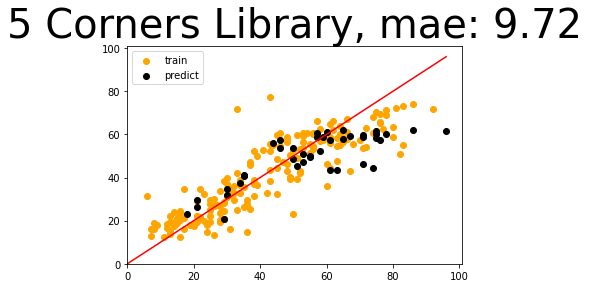

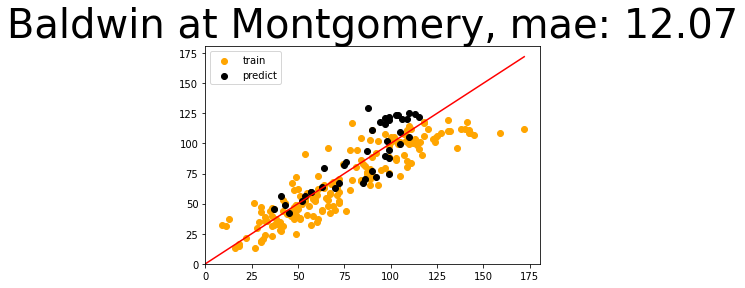

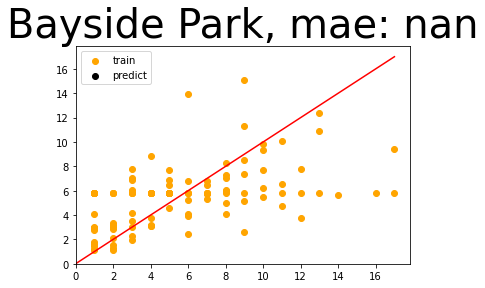

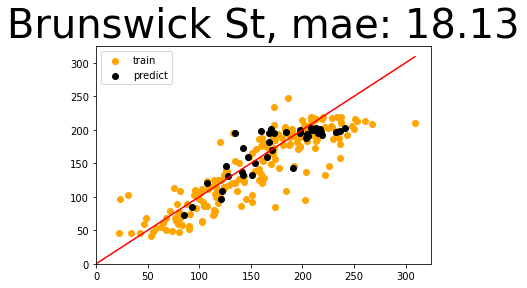

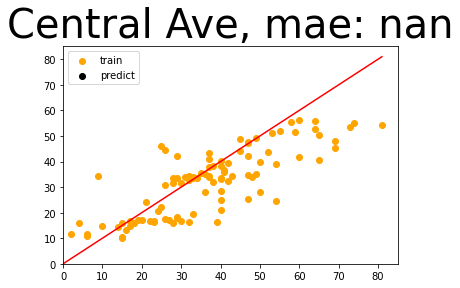

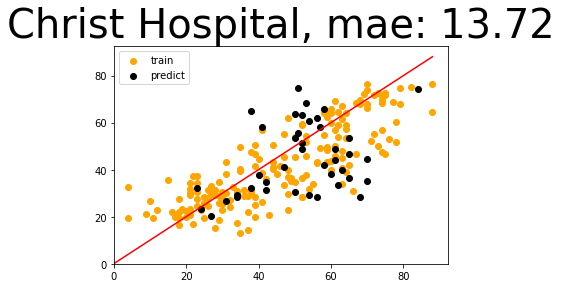

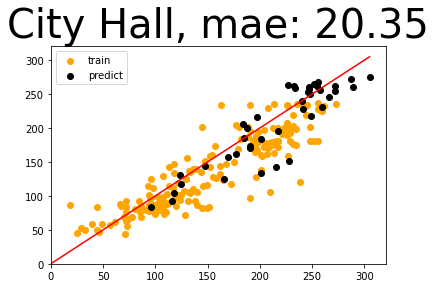

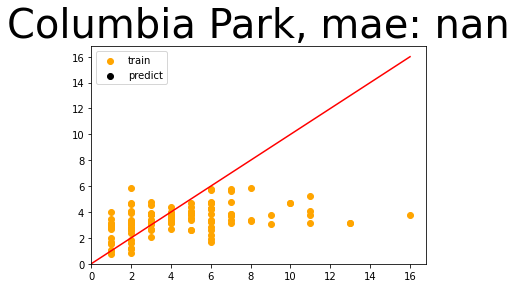

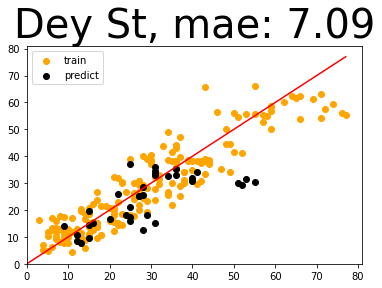

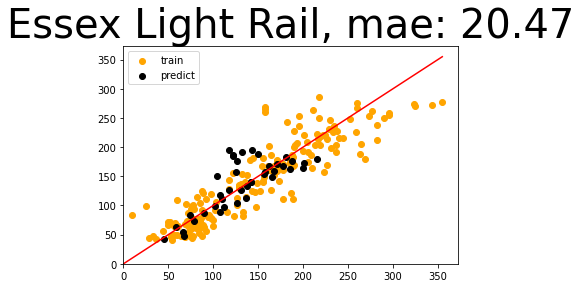

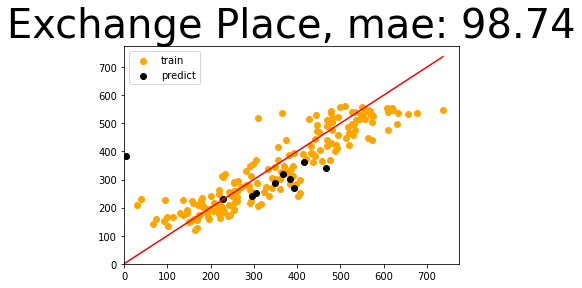

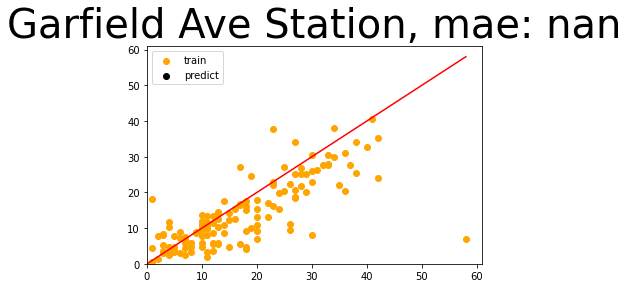

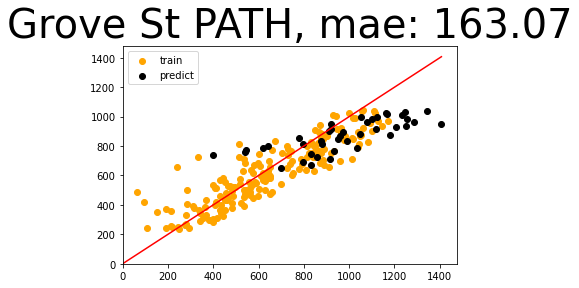

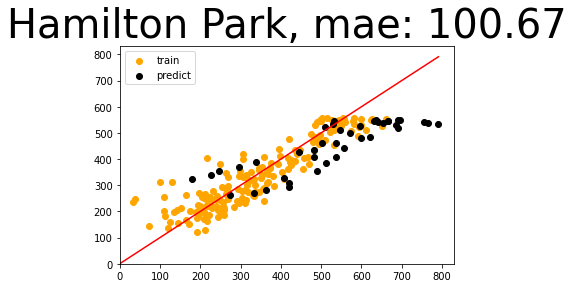

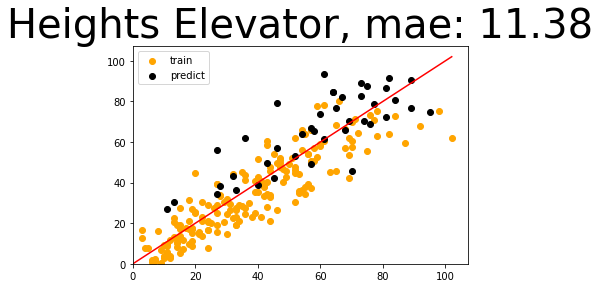

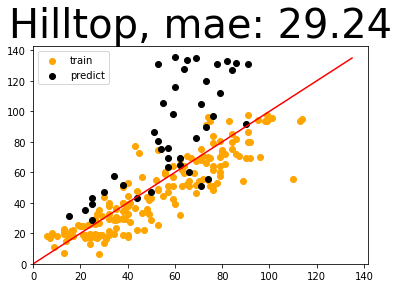

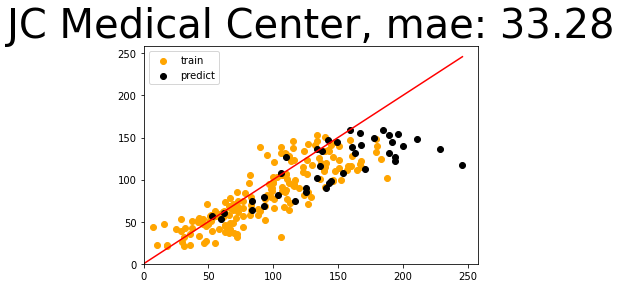

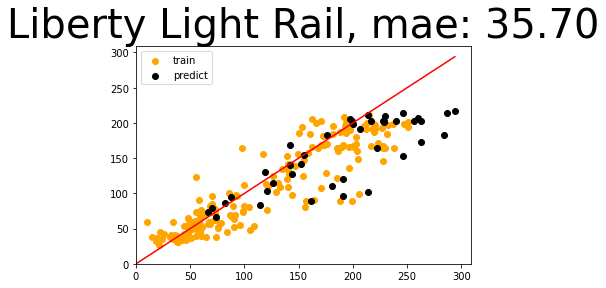

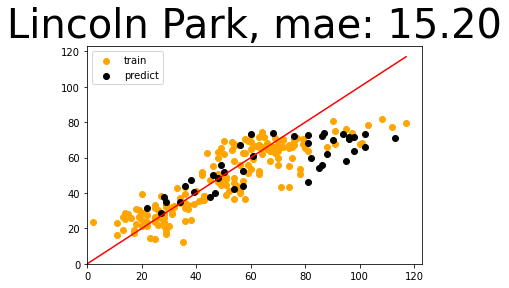

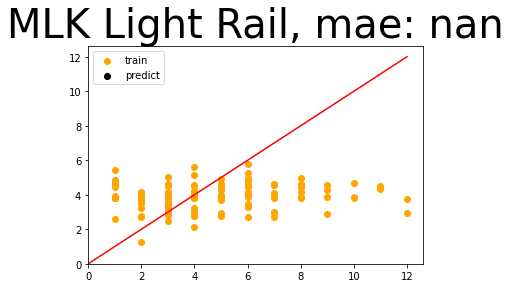

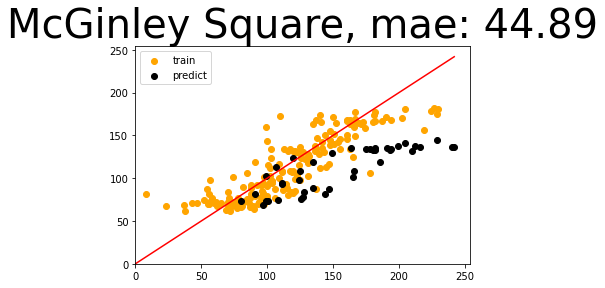

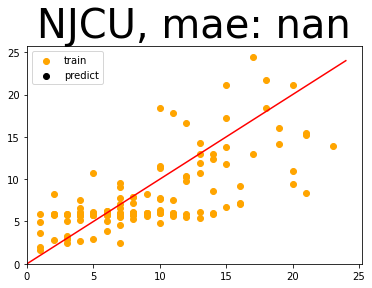

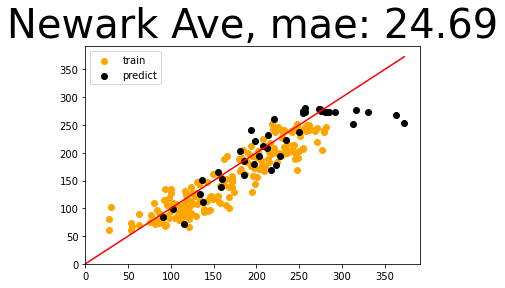

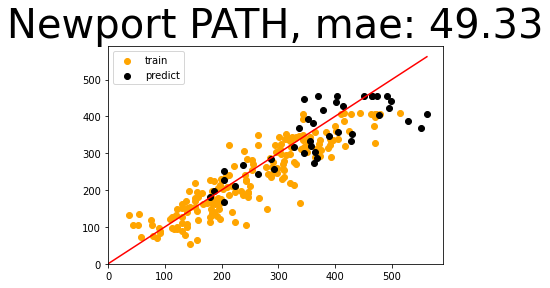

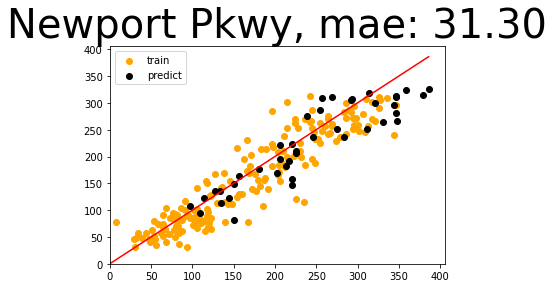

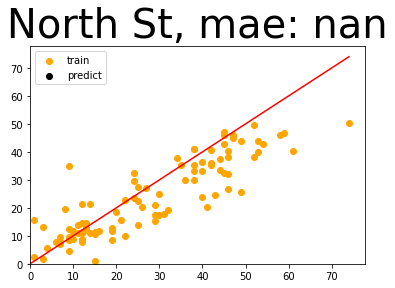

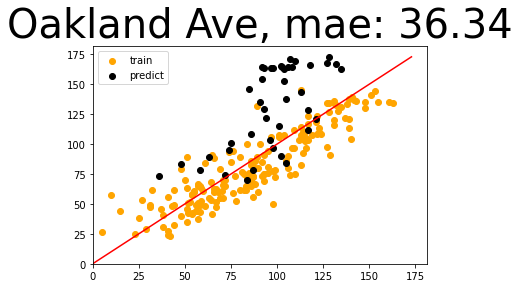

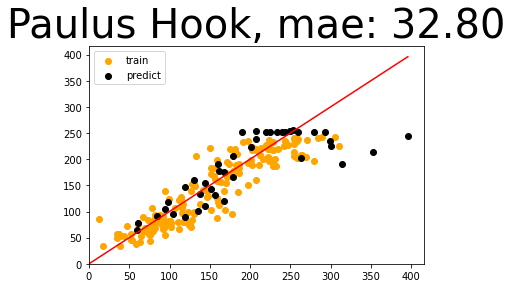

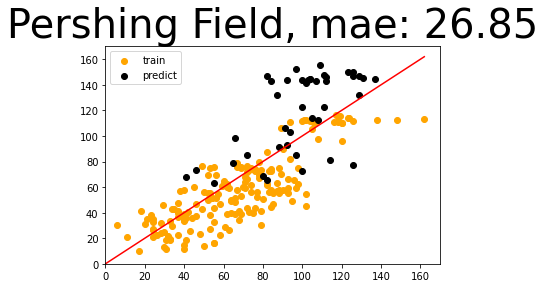

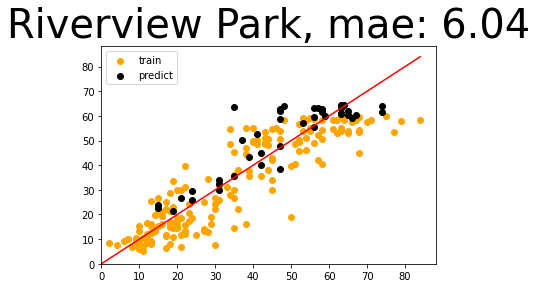

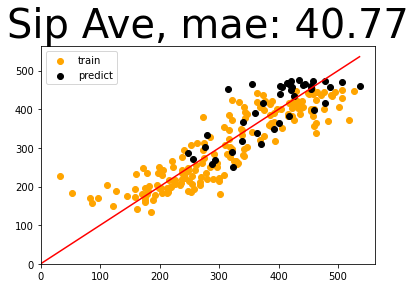

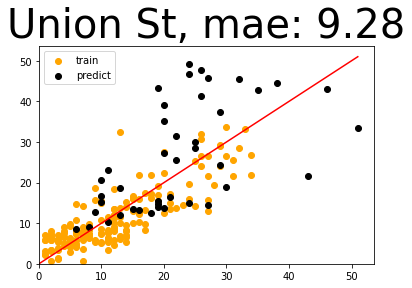

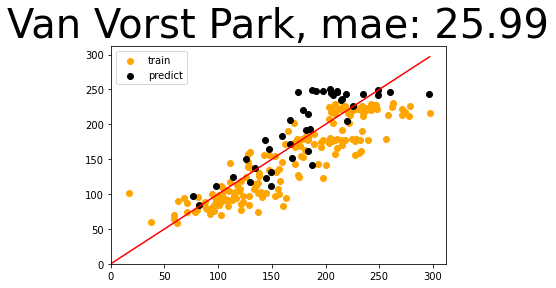

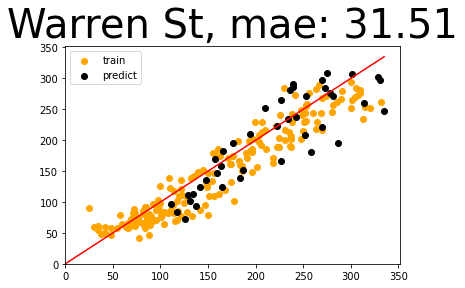

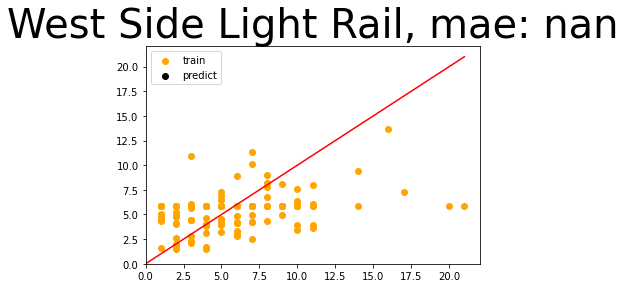

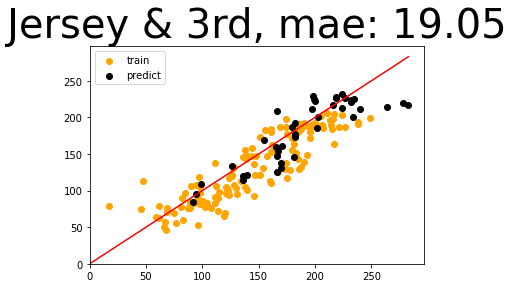

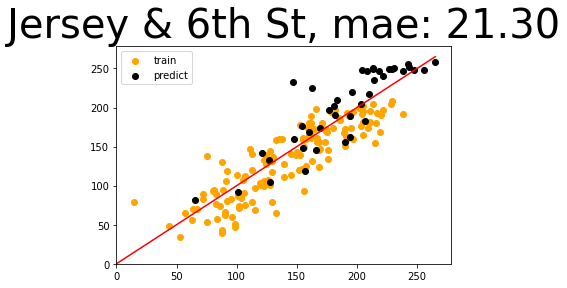

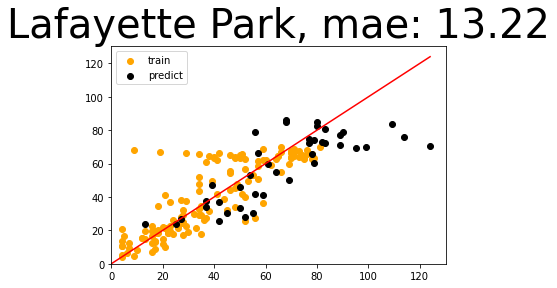

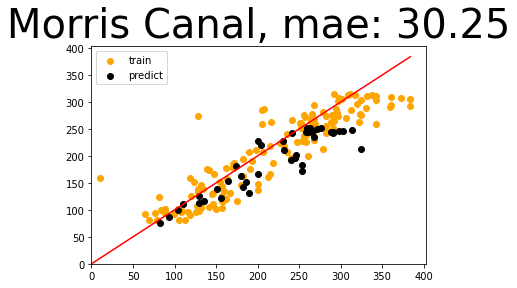

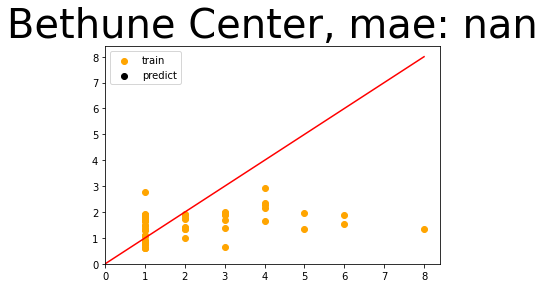

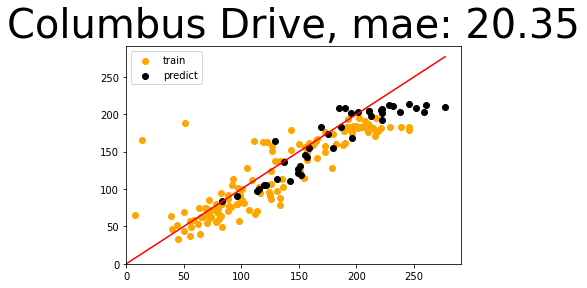

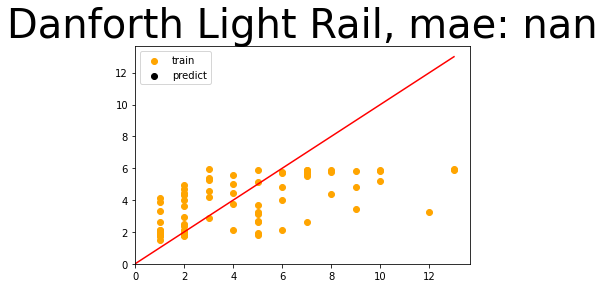

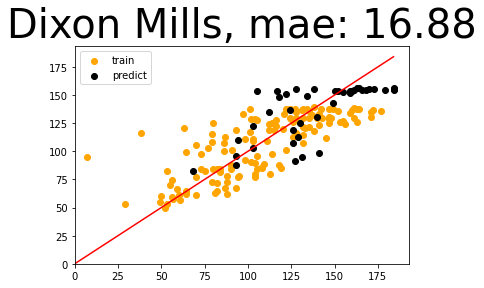

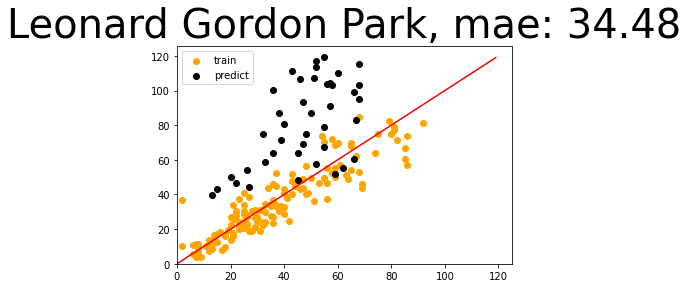

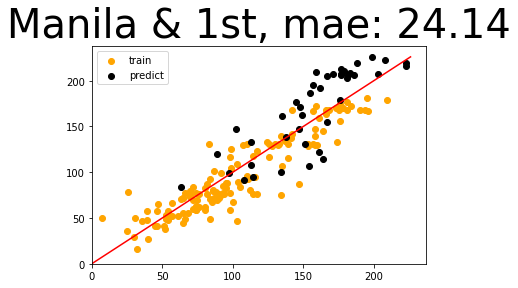

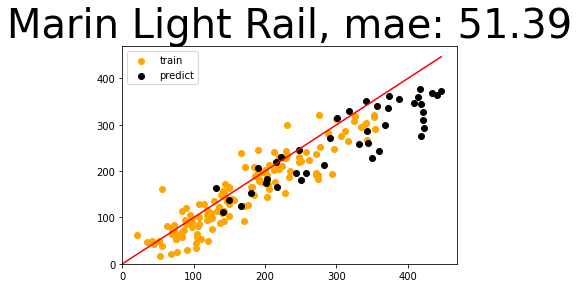

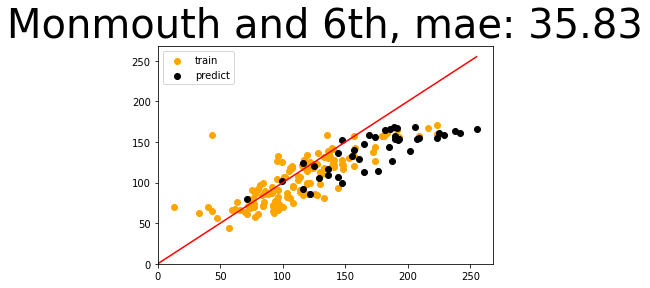

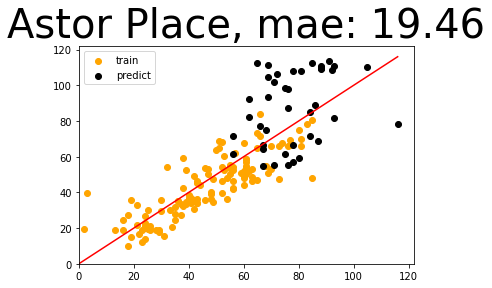

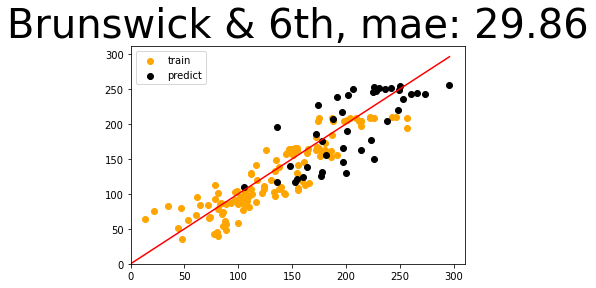

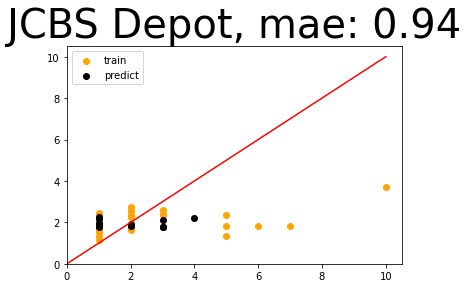

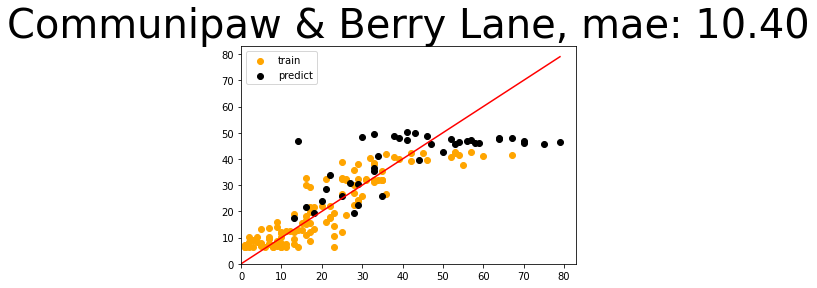

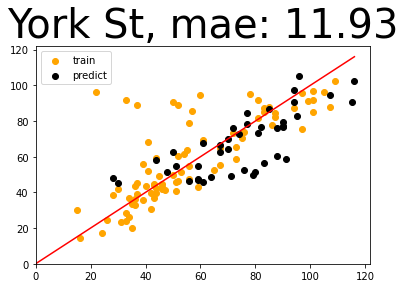

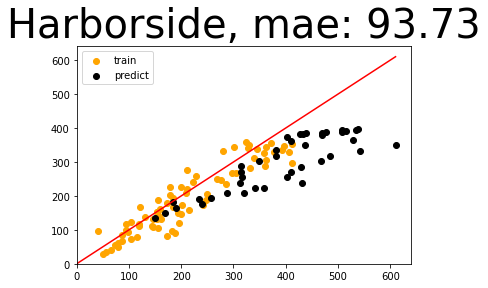

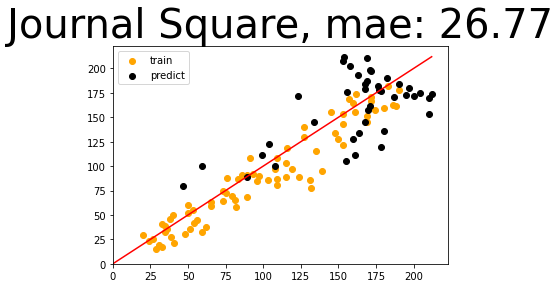

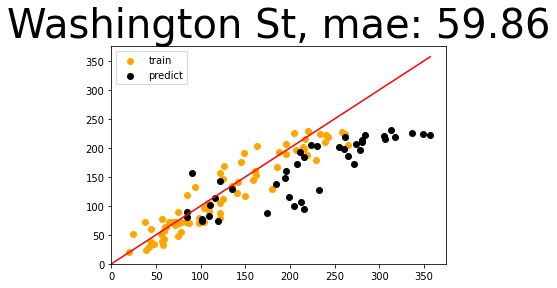

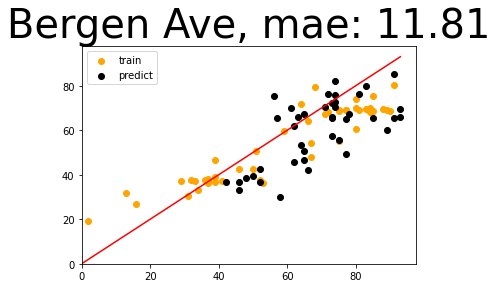

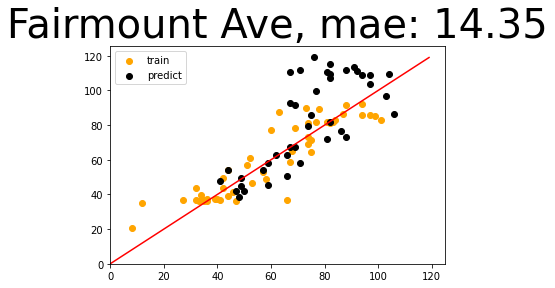

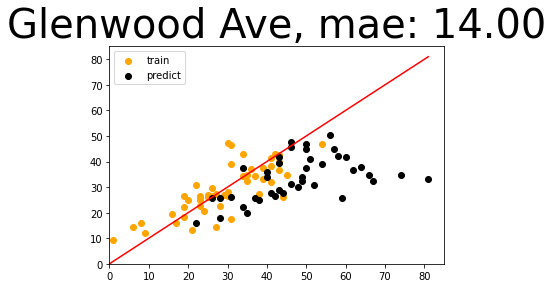

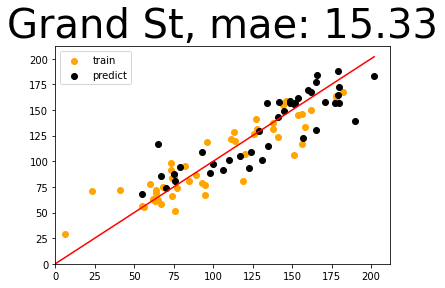

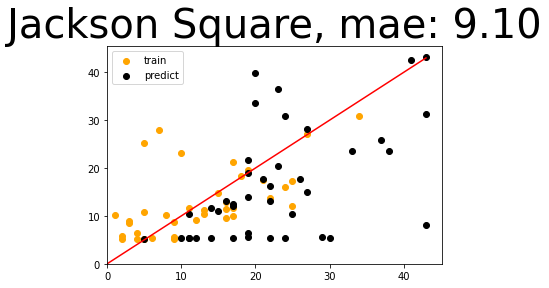

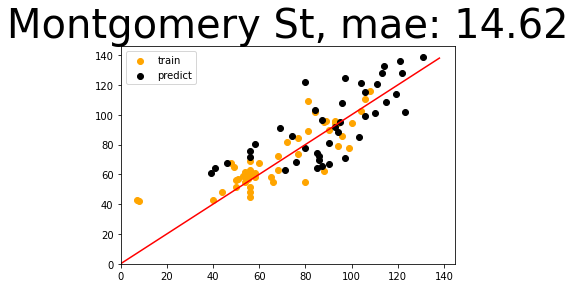

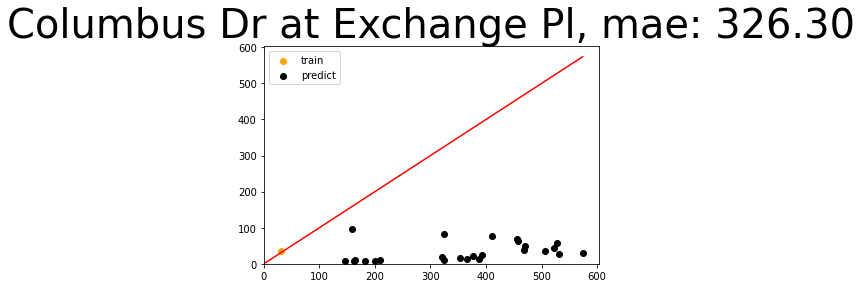

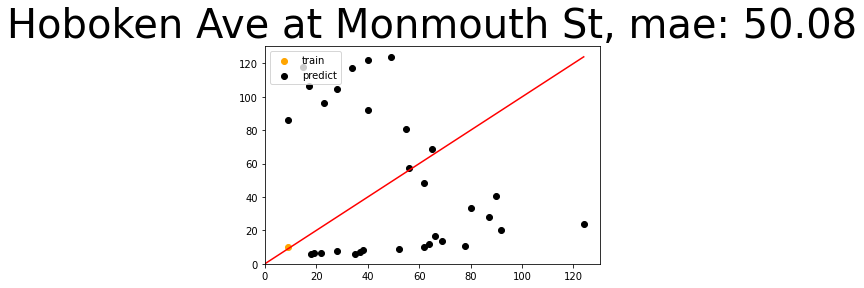

In [30]:
#show result data scatter

for station in stationnames:
    y1 =  y_train 
    y2 = predict_train 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#
    
    test1 = test.iloc[:y_train.shape[0]]
    test1 = pd.DataFrame(test1)
    test1['y'] = y1
    test1['y2'] = y2
    test1 = test1[test1['station']==station]
    test1['yearweek'] = pd.to_datetime(test1['year'].astype(str) + ' ' + test1['week'].astype(str) + ' 1',format='%Y %U %w')
    #print(test1)
     
   
    plt.scatter(test1['y'],test1['y2'],label='train' , color = 'orange'  )
    predict_test = model.predict(x_test_normalized)
    y1 =  y_test 
    y2 =  predict_test 
    #test = pd.DataFrame({ 'y':y1 ,'y2':y2})#
    test2 = test.iloc[-y_test.shape[0]:]
    test2 = pd.DataFrame(test2)
    test2['y'] = y1
    test2['y2'] = y2
    test2 = test2[test2['station']==station]
    test2['yearweek'] = pd.to_datetime(test2['year'].astype(str) + ' ' + test2['week'].astype(str) + ' 1',format='%Y %U %w')
    plt.scatter(test2['y'],test2['y2'],label='predict' , color = 'black' )
    #print(test2)
    maxdata1 = (test1['y'].max())if(test1['y'].max() > test1['y2'].max()) else test1['y2'].max()
    maxdata1 = int(maxdata1)
    maxdata2 = (test2['y'].max())if(test2['y'].max() > test2['y2'].max()) else test2['y2'].max()
    maxdata2 = int( 0 if(np.isnan(maxdata2)) else maxdata2)
    maxdata = (maxdata1)if(maxdata1 > maxdata2) else maxdata2
    maxdata = int(maxdata)
    try:
        mae = mean_absolute_error(test2['y'] ,test2['y2'] )
        plt.title(label=station+", mae: {:0.2f}".format(mae) ,
          fontsize=40,
          color="black")
    except:
        plt.title(label=station+", mae: nan"  ,
          fontsize=40,
          color="black")

    xline =   np.linspace(0,maxdata,maxdata)
    plt.plot([0,maxdata],[0,maxdata] , color='red')
    plt.ylim(bottom=0)
    plt.xlim(xmin=0)
    plt.legend(loc="upper left")
    plt.savefig( 'Model1Images/'+station+'scatter.jpg',bbox_inches='tight', dpi=150)
    plt.show()

In [28]:
with tf.device('/device:GPU:0'):
    results = model.evaluate(x_test_normalized, y_test.values )
print("Result", results)

66/66 [==============================] - 1s 11ms/step - loss: 33.6014 - mae: 33.6014 - mape: 28.0099
Result [33.60135269165039, 33.60135269165039, 28.00989532470703]


In [27]:
model.save('Model1')

INFO:tensorflow:Assets written to: Model1/assets
